##Calendar Spread 전략
Calendar Spread 전략은 동일한 기초 자산을 가진 두 개의 옵션을 사용하지만 만기일이 다른 옵션을 매수하고 매도하는 전략입니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-4b50714239bd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-4b50714239bd>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Long Call Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
<ipython-input-1-4b50714239bd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

            Stock Price  Stock Return  Calendar Spread Profit  \
Date                                                            
2023-01-03   125.070000      0.000000                    -2.0   
2023-01-04   126.360001      0.010314                    -2.0   
2023-01-05   125.019997     -0.010605                    -2.0   
2023-01-06   129.619995      0.036794                    -2.0   
2023-01-09   130.149994      0.004089                    -2.0   
...                 ...           ...                     ...   
2023-12-22   193.600006     -0.005547                    -2.0   
2023-12-26   193.050003     -0.002841                    -2.0   
2023-12-27   193.149994      0.000518                    -2.0   
2023-12-28   193.580002      0.002226                    -2.0   
2023-12-29   192.529999     -0.005424                    -2.0   

            Calendar Spread Return  
Date                                
2023-01-03                0.000000  
2023-01-04               -0.015991  
2023-0

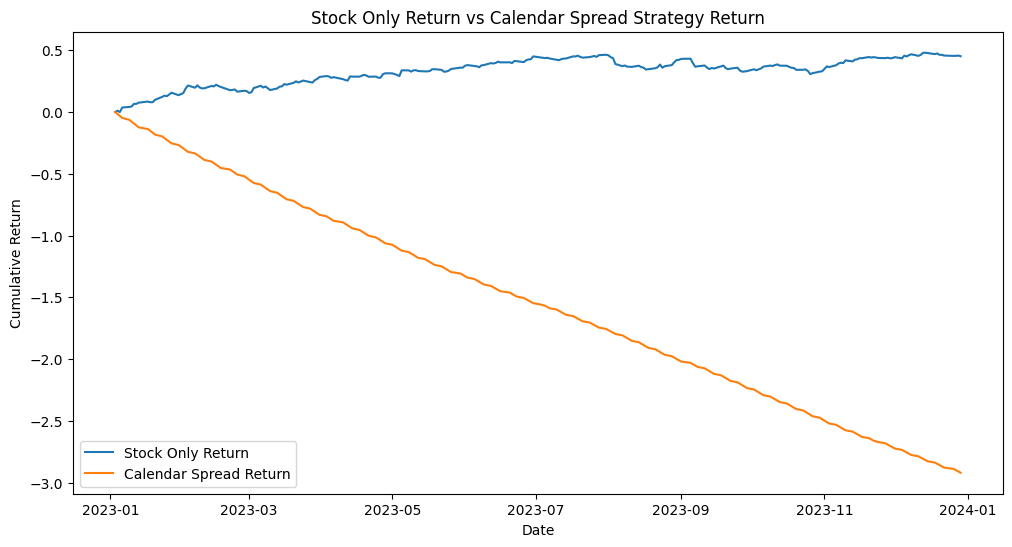

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Calendar Spread 설정
strike_price = 150
premium_paid_long = 5   # 장기 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_short = 3  # 단기 콜 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Calendar Spread 수익 계산 함수
def calculate_calendar_spread(stock_data, strike_price, premium_paid_long, premium_received_short):
    # 콜 옵션 손익 계산 (만기일까지의 데이터로 가정)
    stock_data['Long Call Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
                                                   stock_data['Stock Price'] - strike_price,
                                                   0) - premium_paid_long
    stock_data['Short Call Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price,
                                                    strike_price - stock_data['Stock Price'],
                                                    0) + premium_received_short

    # Calendar Spread 전략의 총 수익 계산
    stock_data['Calendar Spread Profit'] = stock_data['Long Call Profit/Loss'] + stock_data['Short Call Profit/Loss']

    # 총 수익률 계산
    stock_data['Calendar Spread Return'] = stock_data['Calendar Spread Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Calendar Spread Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
calendar_spread_results = calculate_calendar_spread(data, strike_price, premium_paid_long, premium_received_short)

# 결과 출력
print(calendar_spread_results[['Stock Price', 'Stock Return', 'Calendar Spread Profit', 'Calendar Spread Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(calendar_spread_results.index, calendar_spread_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(calendar_spread_results.index, calendar_spread_results['Calendar Spread Return'].cumsum(), label='Calendar Spread Return')
plt.title('Stock Only Return vs Calendar Spread Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-4ae058400604>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-2-4ae058400604>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Long Put Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price,
<ipython-input-2-4ae058400604>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


            Stock Price  Stock Return  Put Calendar Spread Profit  \
Date                                                                
2023-01-03   125.070000      0.000000                        -2.0   
2023-01-04   126.360001      0.010314                        -2.0   
2023-01-05   125.019997     -0.010605                        -2.0   
2023-01-06   129.619995      0.036794                        -2.0   
2023-01-09   130.149994      0.004089                        -2.0   
...                 ...           ...                         ...   
2023-12-22   193.600006     -0.005547                        -2.0   
2023-12-26   193.050003     -0.002841                        -2.0   
2023-12-27   193.149994      0.000518                        -2.0   
2023-12-28   193.580002      0.002226                        -2.0   
2023-12-29   192.529999     -0.005424                        -2.0   

            Put Calendar Spread Return  
Date                                    
2023-01-03          

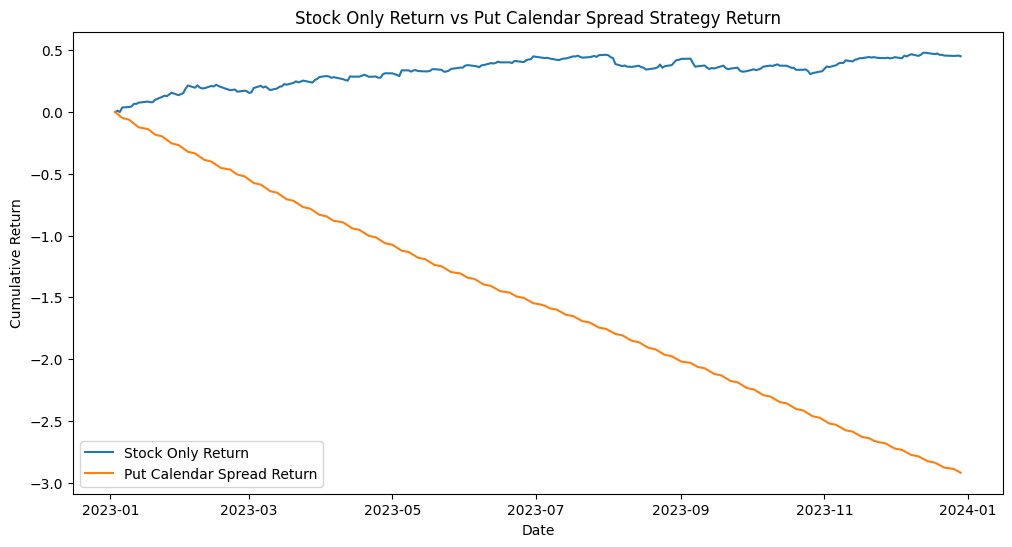

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Calendar Spread 설정
strike_price = 150
premium_paid_long = 5   # 장기 풋 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_short = 3  # 단기 풋 옵션 매도 시 받은 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Calendar Spread 수익 계산 함수
def calculate_put_calendar_spread(stock_data, strike_price, premium_paid_long, premium_received_short):
    # 풋 옵션 손익 계산 (만기일까지의 데이터로 가정)
    stock_data['Long Put Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price,
                                                   strike_price - stock_data['Stock Price'],
                                                   0) - premium_paid_long
    stock_data['Short Put Profit/Loss'] = np.where(stock_data['Stock Price'] < strike_price,
                                                    stock_data['Stock Price'] - strike_price,
                                                    0) + premium_received_short

    # Calendar Spread 전략의 총 수익 계산
    stock_data['Put Calendar Spread Profit'] = stock_data['Long Put Profit/Loss'] + stock_data['Short Put Profit/Loss']

    # 총 수익률 계산
    stock_data['Put Calendar Spread Return'] = stock_data['Put Calendar Spread Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Put Calendar Spread Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
put_calendar_spread_results = calculate_put_calendar_spread(data, strike_price, premium_paid_long, premium_received_short)

# 결과 출력
print(put_calendar_spread_results[['Stock Price', 'Stock Return', 'Put Calendar Spread Profit', 'Put Calendar Spread Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(put_calendar_spread_results.index, put_calendar_spread_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(put_calendar_spread_results.index, put_calendar_spread_results['Put Calendar Spread Return'].cumsum(), label='Put Calendar Spread Return')
plt.title('Stock Only Return vs Put Calendar Spread Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
